<a href="https://colab.research.google.com/github/Gursewak-S/Advance-Python/blob/main/Complete_case_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cca ---› complete case analysis

# df --> missing data --› filter missing data --->
# new_df = filtered_columns_in_which_we_have_missing_data

#  new_df --> missing_data_drop

# Architecture =-› Histogram -••->
#  past column in which we have missing data
# updated column in which we have no missing data

# if past data architecture is overlap to new data architecture ...› it means we can drop missing data
# if past data architecture is not overlap to new data architecture ...› it means we can not drop missing data

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/dsjob.csv")

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [12]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [13]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [14]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
1285,no_enrollment,High School,<1,never
600,no_enrollment,Graduate,11,1
1540,no_enrollment,Graduate,>20,>4
1129,no_enrollment,Graduate,3,never
705,no_enrollment,Graduate,5,1


In [15]:
df['education_level'].value_counts()

,count
education_level,
Graduate,1269
Masters,496
High School,222
Phd,54
Primary School,36


In [16]:
len(df[cols].dropna())/ len(df)

0.9478628464067638

In [17]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [18]:
import matplotlib.pyplot as plt

<Axes: >

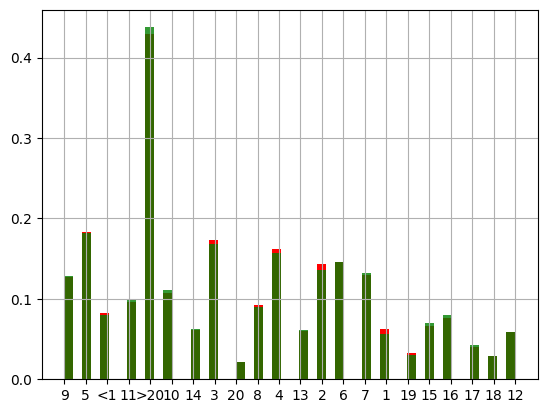

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density= True, color= 'red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [22]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category, ccs data
    new_df['enrolled_university'].value_counts() / len(new_df)
    ],
      axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


In [23]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts() / len(df),

    # percentage of observations per category, ccs data
    new_df['education_level'].value_counts() / len(new_df)
    ],
      axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.596054,0.611497
Masters,0.232973,0.239346
High School,0.104274,0.106541
Phd,0.025364,0.026264
Primary School,0.016909,0.016353


In [24]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['experience'].value_counts() / len(df),

    # percentage of observations per category, ccs data
    new_df['experience'].value_counts() / len(new_df)
    ],
      axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
experience,,
>20,0.179897,0.183845
5,0.076562,0.076313
3,0.072334,0.070862
4,0.068107,0.065907
6,0.061062,0.061447
2,0.060122,0.056987
7,0.054486,0.055500
9,0.053077,0.054014
10,0.045092,0.046581


In [25]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['last_new_job'].value_counts() / len(df),

    # percentage of observations per category, ccs data
    new_df['last_new_job'].value_counts() / len(new_df)
    ],
      axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
last_new_job,,
1,0.415218,0.426660
>4,0.165806,0.170961
2,0.160639,0.162537
never,0.121184,0.116452
3,0.062471,0.065411
4,0.055895,0.057978
